In [200]:
import pandas as pd
import plotly.graph_objects as go

In [201]:
df = pd.read_csv("Ops001.csv",parse_dates=["Date"])

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                16 non-null     datetime64[ns]
 1   Branch Name                         16 non-null     object        
 2   Staff Name                          16 non-null     object        
 3   # Drops                             16 non-null     int64         
 4   # Partials                          16 non-null     int64         
 5   # Irregular Borrower                16 non-null     int64         
 6   # Paid Off Yesterday                16 non-null     int64         
 7   # Today Disbursed                   16 non-null     int64         
 8   # Today Paid off                    16 non-null     int64         
 9   # Virtual New Borrower (Disbursed)  16 non-null     int64         
 10  # Returning Borrowers (Disbu

In [203]:
df.head()

,Date,Branch Name,Staff Name,# Drops,# Partials,# Irregular Borrower,# Paid Off Yesterday,# Today Disbursed,# Today Paid off,# Virtual New Borrower (Disbursed),# Returning Borrowers (Disbursed),# CGT Trainings,# Recognized New Members,# Recognized Return Members,$ Portfolio Outstanding
0,2021-12-10,Dallas,Jimy Hendrix,17,25,24,6,25,22,9,7,9,7,25,58131.62
1,2021-12-10,Dallas,Steve Ray Vaughan,12,21,11,25,24,13,25,15,14,7,13,150764.45
2,2021-12-10,Dallas,Eric Clapton,6,23,19,5,22,15,7,24,18,12,12,64772.17
3,2021-12-10,Dallas,Total,35,69,54,36,71,50,41,46,41,26,50,273668.24
4,2021-12-10,Memphis,Jimmy Page,11,10,21,7,9,22,24,20,25,22,10,58295.18


In [204]:
# set the date variable
d = "2021-12-10"

In [205]:
# set the branch variable
b = "Memphis"

In [217]:
day = df['Date'].iloc[0]

In [219]:
day = day.strftime("%Y-%m-%d")

In [221]:
day

'2021-12-10'

In [220]:
type(day)

str

In [206]:
df = df[(df['Date']==d) & (df['Branch Name']==b)]

In [207]:
df.reset_index(drop=True,inplace=True)

In [208]:
df

,Date,Branch Name,Staff Name,# Drops,# Partials,# Irregular Borrower,# Paid Off Yesterday,# Today Disbursed,# Today Paid off,# Virtual New Borrower (Disbursed),# Returning Borrowers (Disbursed),# CGT Trainings,# Recognized New Members,# Recognized Return Members,$ Portfolio Outstanding
0,2021-12-10,Memphis,Jimmy Page,11,10,21,7,9,22,24,20,25,22,10,58295.18
1,2021-12-10,Memphis,BB King,16,25,16,25,20,17,7,22,22,17,17,148058.54
2,2021-12-10,Memphis,Steve Ray Vaughan,8,7,25,12,13,13,9,20,7,6,6,58271.08
3,2021-12-10,Memphis,Total,35,42,62,44,42,52,40,62,54,45,33,264624.80


In [181]:
loan_quality = df.iloc[0:3:,0:6]

In [182]:
loan_quality

,Date,Branch Name,Staff Name,# Drops,# Partials,# Irregular Borrower
0,2021-12-10,Memphis,Jimmy Page,11,10,21
1,2021-12-10,Memphis,BB King,16,25,16
2,2021-12-10,Memphis,Steve Ray Vaughan,8,7,25


In [183]:
renewal_trend = df.loc[0:2,['Date','Branch Name','Staff Name','# Paid Off Yesterday','# Today Disbursed','# Today Paid off']]

In [184]:
recruitment = df.loc[0:2,['Date','Branch Name','Staff Name','# Virtual New Borrower (Disbursed)','# Returning Borrowers (Disbursed)','# CGT Trainings',
                    '# Recognized New Members','# Recognized Return Members']]

In [185]:
portfolio = df.loc[0:2,['Date','Branch Name','Staff Name','$ Portfolio Outstanding']]

In [186]:
portfolio

,Date,Branch Name,Staff Name,$ Portfolio Outstanding
0,2021-12-10,Memphis,Jimmy Page,58295.18
1,2021-12-10,Memphis,BB King,148058.54
2,2021-12-10,Memphis,Steve Ray Vaughan,58271.08


# Loan Quality metrics

In [187]:
loan_quality

,Date,Branch Name,Staff Name,# Drops,# Partials,# Irregular Borrower
0,2021-12-10,Memphis,Jimmy Page,11,10,21
1,2021-12-10,Memphis,BB King,16,25,16
2,2021-12-10,Memphis,Steve Ray Vaughan,8,7,25


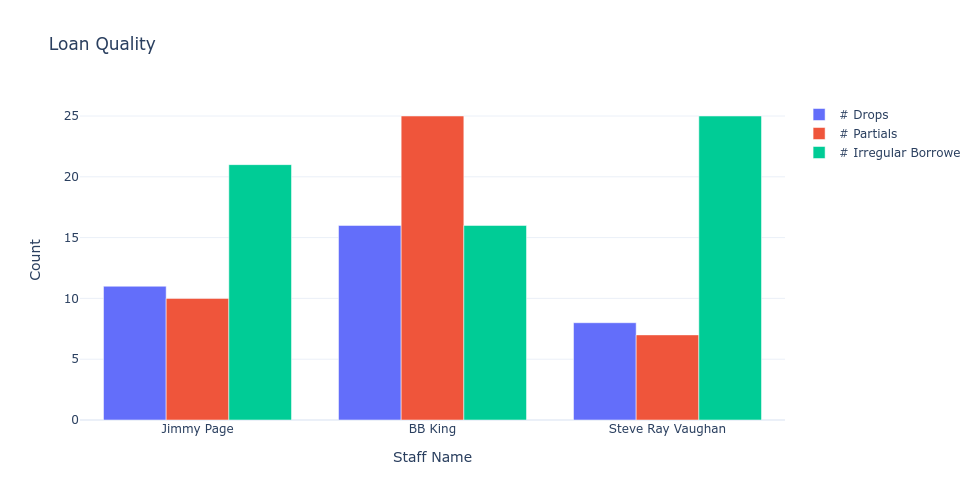

In [188]:
fig1 = go.Figure(data=[go.Bar(name = '# Drops',x = loan_quality['Staff Name'],y = loan_quality['# Drops']),
                       go.Bar(name = '# Partials',x = loan_quality['Staff Name'],y = loan_quality['# Partials']),
                       go.Bar(name = '# Irregular Borrower', x = loan_quality['Staff Name'],y = loan_quality['# Irregular Borrower'])
                      ]
                )

fig1.update_layout(template="plotly_white",
    width=500,height=500,
    title="Loan Quality",
    xaxis_title="Staff Name",
    yaxis_title="Count"
    #legend_title="Legend Title",
    #font=dict(
    #    family="Courier New, monospace",
    #    size=18,
    #    color="RebeccaPurple"
    #)
)

fig1.show()

# Renewal trend metrics

In [189]:
renewal_trend

,Date,Branch Name,Staff Name,# Paid Off Yesterday,# Today Disbursed,# Today Paid off
0,2021-12-10,Memphis,Jimmy Page,7,9,22
1,2021-12-10,Memphis,BB King,25,20,17
2,2021-12-10,Memphis,Steve Ray Vaughan,12,13,13


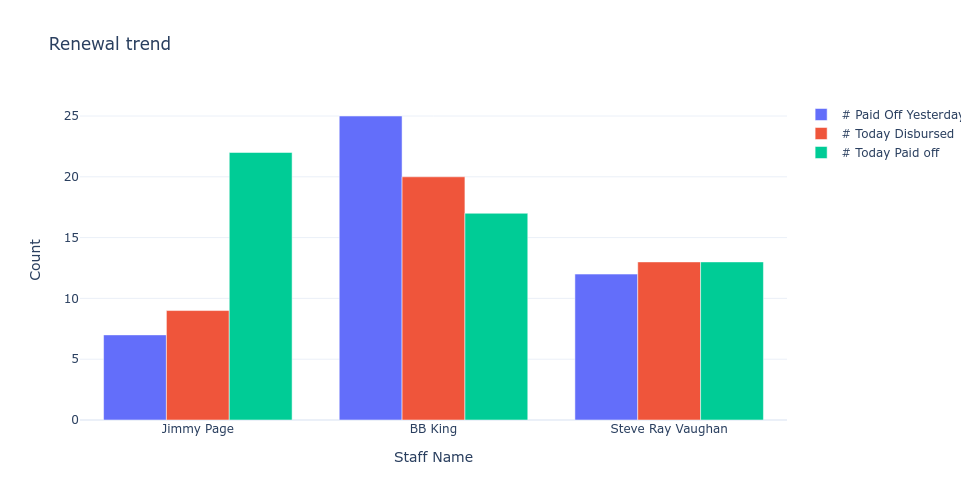

In [190]:
plot = go.Figure(data=[go.Bar(name = '# Paid Off Yesterday',x = renewal_trend['Staff Name'],y = renewal_trend['# Paid Off Yesterday']),
                       go.Bar(name = '# Today Disbursed',x = renewal_trend['Staff Name'],y = renewal_trend['# Today Disbursed']),
                       go.Bar(name = '# Today Paid off', x = renewal_trend['Staff Name'],y = renewal_trend['# Today Paid off'])
                      ]
                )

plot.update_layout(template="plotly_white",
    width=500,height=500,
    title="Renewal trend",
    xaxis_title="Staff Name",
    yaxis_title="Count")

plot.show()

# Recruitment Metrics

In [191]:
recruitment

,Date,Branch Name,Staff Name,# Virtual New Borrower (Disbursed),# Returning Borrowers (Disbursed),# CGT Trainings,# Recognized New Members,# Recognized Return Members
0,2021-12-10,Memphis,Jimmy Page,24,20,25,22,10
1,2021-12-10,Memphis,BB King,7,22,22,17,17
2,2021-12-10,Memphis,Steve Ray Vaughan,9,20,7,6,6


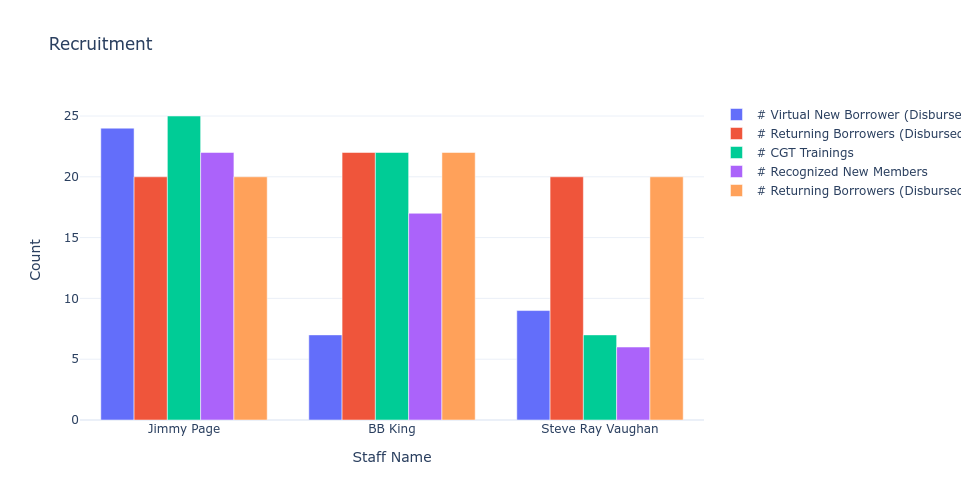

In [192]:
plot = go.Figure(data=[go.Bar(name = '# Virtual New Borrower (Disbursed)',x = recruitment['Staff Name'],y = recruitment['# Virtual New Borrower (Disbursed)']),
                       go.Bar(name = '# Returning Borrowers (Disbursed)',x = recruitment['Staff Name'],y = recruitment['# Returning Borrowers (Disbursed)']),
                       go.Bar(name = '# CGT Trainings', x = recruitment['Staff Name'],y = recruitment['# CGT Trainings']),
                       go.Bar(name = '# Recognized New Members', x = recruitment['Staff Name'],y = recruitment['# Recognized New Members']),
                       go.Bar(name = '# Returning Borrowers (Disbursed)', x = recruitment['Staff Name'],y = recruitment['# Returning Borrowers (Disbursed)'])
                      ]
                )

plot.update_layout(template="plotly_white",
    width=500,height=500,
    title="Recruitment",
    xaxis_title="Staff Name",
    yaxis_title="Count")

plot.show()

In [193]:
portfolio

,Date,Branch Name,Staff Name,$ Portfolio Outstanding
0,2021-12-10,Memphis,Jimmy Page,58295.18
1,2021-12-10,Memphis,BB King,148058.54
2,2021-12-10,Memphis,Steve Ray Vaughan,58271.08


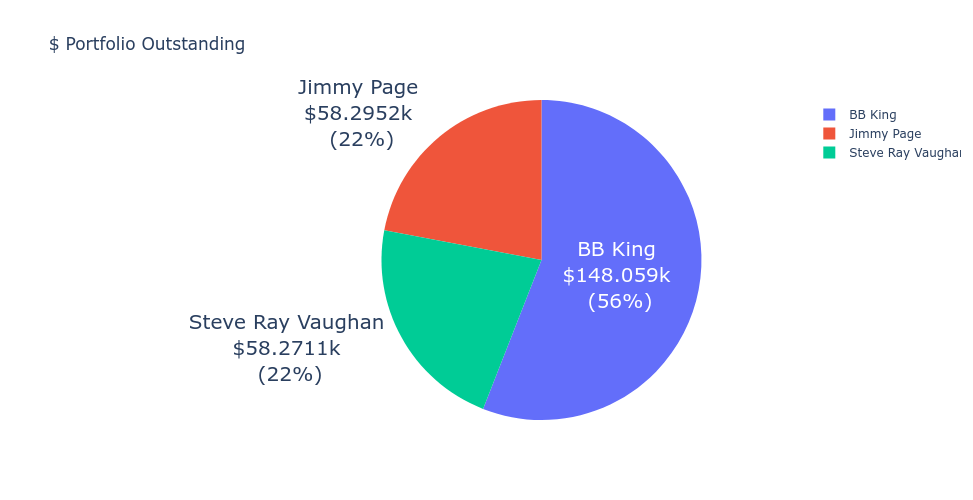

In [194]:
fig = go.Figure(data=[go.Pie(labels=portfolio['Staff Name'], values=portfolio['$ Portfolio Outstanding'])])

fig.update_layout(template="plotly_white",
    width=500,height=500,
    title="$ Portfolio Outstanding"
)

fig.update_traces(hoverinfo='label+value+percent', textinfo='value',texttemplate = "%{label} <br>%{value:$,s} <br>(%{percent})", textfont_size=20)

fig.show()

In [195]:
df.columns

Index(['Date', 'Branch Name', 'Staff Name', '# Drops', '# Partials',
       '# Irregular Borrower', '# Paid Off Yesterday', '# Today Disbursed',
       '# Today Paid off', '# Virtual New Borrower (Disbursed)',
       '# Returning Borrowers (Disbursed)', '# CGT Trainings',
       '# Recognized New Members', '# Recognized Return Members',
       '$ Portfolio Outstanding'],
      dtype='object')

## Grand Total - metrics

In [196]:
total = df.iloc[3,:]

In [197]:
total

Date                                  2021-12-10 00:00:00
Branch Name                                       Memphis
Staff Name                                          Total
# Drops                                                35
# Partials                                             42
# Irregular Borrower                                   62
# Paid Off Yesterday                                   44
# Today Disbursed                                      42
# Today Paid off                                       52
# Virtual New Borrower (Disbursed)                     40
# Returning Borrowers (Disbursed)                      62
# CGT Trainings                                        54
# Recognized New Members                               45
# Recognized Return Members                            33
$ Portfolio Outstanding                          264624.8
Name: 3, dtype: object

In [198]:
total['# Drops']

35

In [199]:
n_of_drops = total['# Drops']
n_of_partial = total['# Partials']
irreg_borrower = total['# Irregular Borrower']
payed_yesterday = total['# Paid Off Yesterday']
today_disbursed = total['# Today Disbursed']
today_paid_off = total['# Today Paid off']
virtual_new_borrower = total['# Virtual New Borrower (Disbursed)']
return_borrowers = total['# Returning Borrowers (Disbursed)']
cgt_trainings = total['# CGT Trainings']
recognized_new_members = total['# Recognized New Members']
recognized_return_members = total['# Recognized Return Members']
portfolio_ouatstanding = total['$ Portfolio Outstanding']